# 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

## 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


# 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 쥬피터 노트북 사용중이라면 추가해줘야 할 코드
# %matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv("../data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# scikit-learn에서 제공하는 model_selection의 train_test_split으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- test_size=20 -> 80%는 train set, 20%는 test set
- X: feature, y: label
- random_state=42: 같은 환경이면 같은 값을 가지고 옴. 이걸 설정하지 않으면, 매번 샘플링 할 때 마다 다른 데이터들을 가져오게 된다.
- random_state를 설정하지 않으면, 어떤 hyperparameter를 변경해서 score가 올라갔는지, 아니면 그냥 랜덤하게 점수가 올라간건지 알 수가 없음


In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기

In [10]:
# DecisionTree를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [11]:
# 학습을 시킵니다. (모의고사 -> 정답도 함께 넣어준다.)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
feature_names = X_train.columns.tolist()

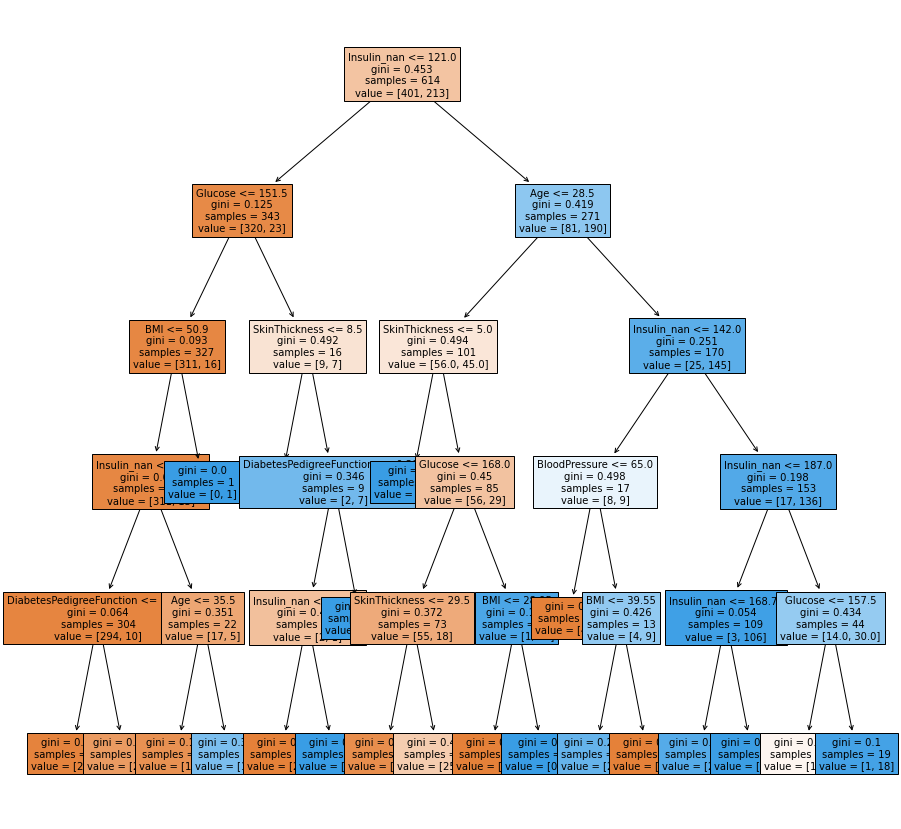

In [13]:
# 모델 시각화

from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [14]:
# 예측을 하고 결과를 y_predict에 담습니다. (실제 시험 -> 정답은 넣지 않는다.)

y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

- 0: 당뇨병이 발병하지 않은 케이스
- 1: 당뇨병이 발병한 케이스

## 최적의 max_depth 값 찾기

In [15]:
# max_depth값에 따른 score 모아보기

from sklearn.metrics import accuracy_score

for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


- max_depth=4일 때 87점으로 가장 높다.
- 90점 보다 좋은 점수가 나오지 않음.

## Grid Search

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/cross_validation.html

- Cross-Validation으로 fold를 여러개로 나누고 그 fold의 수 만큼 학습을 여러번 해서 그 점수의 평균값을 사용한다면, 결과가 더 좋아질 것이다.

In [16]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

- max_depth: 트리의 최대 깊이
- max_features: 모든 feature를 사용하지 않고, 몇 퍼센트만 사용하겠다.
- n_jobs=-1: 내 컴퓨터에서 사용 가능한 모든 프로세스를 다 사용하겠다.
- cv = 5: cross-validation을 5개의 fold로 나눠서 진행한다.
- verbose=1: 로그를 찍는다.

In [17]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [18]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [19]:
clf.best_score_

0.8664934026389444

In [34]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
779,0.006305,0.000561,0.003736,0.000449,6,0.959682,9,"{'min_samples_split': 6, 'max_features': 0.959...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
158,0.007039,0.000804,0.006395,0.005108,6,0.9503,9,"{'min_samples_split': 6, 'max_features': 0.950...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
802,0.007156,0.001089,0.003705,0.000467,6,0.952023,9,"{'min_samples_split': 6, 'max_features': 0.952...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
885,0.005957,0.000237,0.004123,0.001153,4,0.817059,10,"{'min_samples_split': 4, 'max_features': 0.817...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
670,0.006878,0.000578,0.004931,0.001522,6,0.92672,9,"{'min_samples_split': 6, 'max_features': 0.926...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1


- parameter  값에 따라 score가 어떻게 출력 되었는지 보여줌.
- split0~split4:training data를 5개의 fold로 나눠서 각 fold를 돌아가면서 validation set으로 놓고 측정해서, best parameters를 찾는다.

In [21]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [22]:
clf.score(X_test, y_test)

0.8701298701298701

- 임의의 파라미터를 지정해서 하는 것 보다 best hyper-parameters를 찾아서 사용했더니 훨씬 더 좋은 score가 나왔다.

## Random Search

In [23]:
model
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [24]:
# 1~20 사이에 10개의 랜덤한 정수

max_depth = np.random.randint(3, 20, 10)

In [25]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [26]:
param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features,
                       "min_samples_split": list(range(2, 7))}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 8,  6, 11, 10,  9,  7, 14,  9, 10, 17]),
                                        'max_features': array([0.88169325, 0.92468596, 0.76830805, 0.73640867, 0.93564997,
       0.89645004, 0.86913129, 0.96942465, 0.85723965, 0.90790602,
       0.7252311 , 0.76080953, 0.7678817 , 0.98109173, 0.99470728,
       0....
       0.90953033, 0.87799562, 0.99252394, 0.76564907, 0.82081354,
       0.76896198, 0.93856827, 0.92050728, 0.91882659, 0.7627729 ,
       0.9090078 , 0.93399239, 0.7065632 , 0.9627434 , 0.81459271,
       0.72249765, 0.98760973, 0.86904441, 0.72007558, 0.7357344 ,
       0.76496076, 0.9344175 , 0.93105924, 0.98972033, 0.83726704,
       0.88809281, 0.85177326, 0.95406171, 0.90888668, 0.97188382]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [28]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.9310592386398763, 'max_depth': 9}

In [29]:
clf.best_score_

0.8713847794215648

In [30]:
clf.score(X_test, y_test)

0.8181818181818182

In [31]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
779,0.006305,0.000561,0.003736,0.000449,6,0.959682,9,"{'min_samples_split': 6, 'max_features': 0.959...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
158,0.007039,0.000804,0.006395,0.005108,6,0.9503,9,"{'min_samples_split': 6, 'max_features': 0.950...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
802,0.007156,0.001089,0.003705,0.000467,6,0.952023,9,"{'min_samples_split': 6, 'max_features': 0.952...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
885,0.005957,0.000237,0.004123,0.001153,4,0.817059,10,"{'min_samples_split': 4, 'max_features': 0.817...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
670,0.006878,0.000578,0.004931,0.001522,6,0.92672,9,"{'min_samples_split': 6, 'max_features': 0.926...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1


- 결과를 반복해서 실행해보고 파라미터들의 범위를 조정해 가면서 좋은 score를 내는 애들을 찾는다.

# 정확도(Accuracy) 측정하기

In [32]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당해 줍니다.

diff_count = abs(y_predict - y_test).sum()
diff_count

28

- 예측과 실제 정답이 다른 경우 -1 또는 1이 나온다. 그래서 절대값을 씌워준다.
- 지난주차에서는 서로 다른게 15개였는데, 이번에는 26개가 나옴. -> 지난주차에서는 순서대로 위에 80%, 아래 20%로 나눠줌. / 이번주차는 train_test_split()을 사용해서 랜덤하게 가져옴. -> 지난주차는 overfitting이 되었을 수도 있음.
- DecisionTreeClassifier(random_state=42)옵션을 주면 매번 같은 값이 나옴. random_state 옵션을 주지 않으면 model을 새로 불러올 때 마다 다른 나무를 그리게 되기 때문에 값이 다르게 나온다.

In [33]:
# accuracy를 구합니다.

accuracy_score(y_test, y_predict) * 100

81.81818181818183